 Install

In [5]:
!pip install -q pandas numpy matplotlib seaborn scikit-learn

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler, LabelEncoder

import warnings
warnings.filterwarnings("ignore")
sns.set(style="whitegrid")

In [7]:
from google.colab import files
uploaded = files.upload()

Saving predictive_maintenance.csv to predictive_maintenance (1).csv


In [8]:
import io

In [10]:
df = pd.read_csv(io.BytesIO(uploaded['predictive_maintenance (1).csv']))
print("Shape:", df.shape)
df.head()

Shape: (10000, 10)


,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,No Failure
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,No Failure
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,No Failure
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,No Failure
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,No Failure


In [11]:
print(df.columns)

Index(['UDI', 'Product ID', 'Type', 'Air temperature [K]',
       'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]',
       'Tool wear [min]', 'Target', 'Failure Type'],
      dtype='object')


In [13]:
if df['Failure Type'].dtype == 'object':
    le = LabelEncoder()
    df['Failure Type'] = le.fit_transform(df['Failure Type'])
    print("Label Mapping:", dict(zip(le.classes_, le.transform(le.classes_))))

Label Mapping: {'Heat Dissipation Failure': np.int64(0), 'No Failure': np.int64(1), 'Overstrain Failure': np.int64(2), 'Power Failure': np.int64(3), 'Random Failures': np.int64(4), 'Tool Wear Failure': np.int64(5)}


In [15]:
X = df.drop("Failure Type", axis=1)
y = df["Failure Type"]

# Encode any categorical feature columns
for col in X.columns:
    if X[col].dtype == 'object':
        X[col] = LabelEncoder().fit_transform(X[col])

# Normalize numeric features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [16]:
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, stratify=y, random_state=42)

model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [17]:
y_pred = model.predict(X_test)

print("Classification Report:\n")
print(classification_report(y_test, y_pred))

Classification Report:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        22
           1       1.00      1.00      1.00      1930
           2       0.89      1.00      0.94        16
           3       1.00      0.95      0.97        19
           4       0.00      0.00      0.00         4
           5       1.00      0.89      0.94         9

    accuracy                           1.00      2000
   macro avg       0.81      0.81      0.81      2000
weighted avg       1.00      1.00      1.00      2000



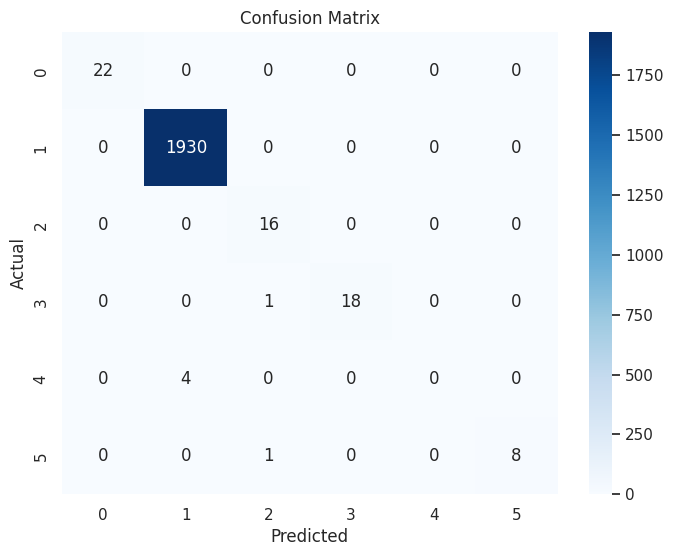

In [18]:
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

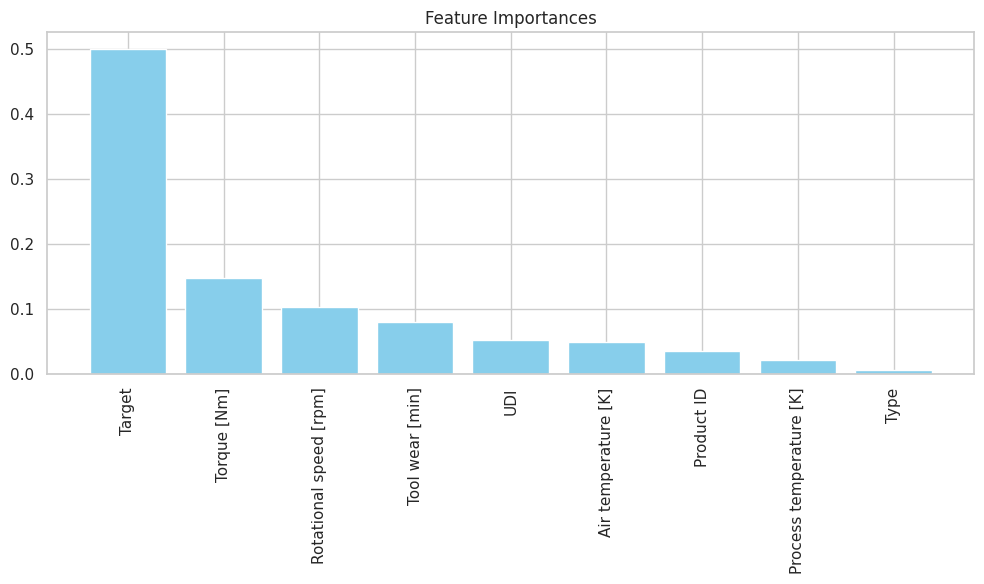

In [19]:
importances = model.feature_importances_
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(10, 6))
plt.title("Feature Importances")
plt.bar(range(X.shape[1]), importances[indices], color="skyblue", align="center")
plt.xticks(range(X.shape[1]), X.columns[indices], rotation=90)
plt.tight_layout()
plt.show()